In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv("/content/sample_data/housing.csv")

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:

df.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


the only missing values in the total bedrooms column

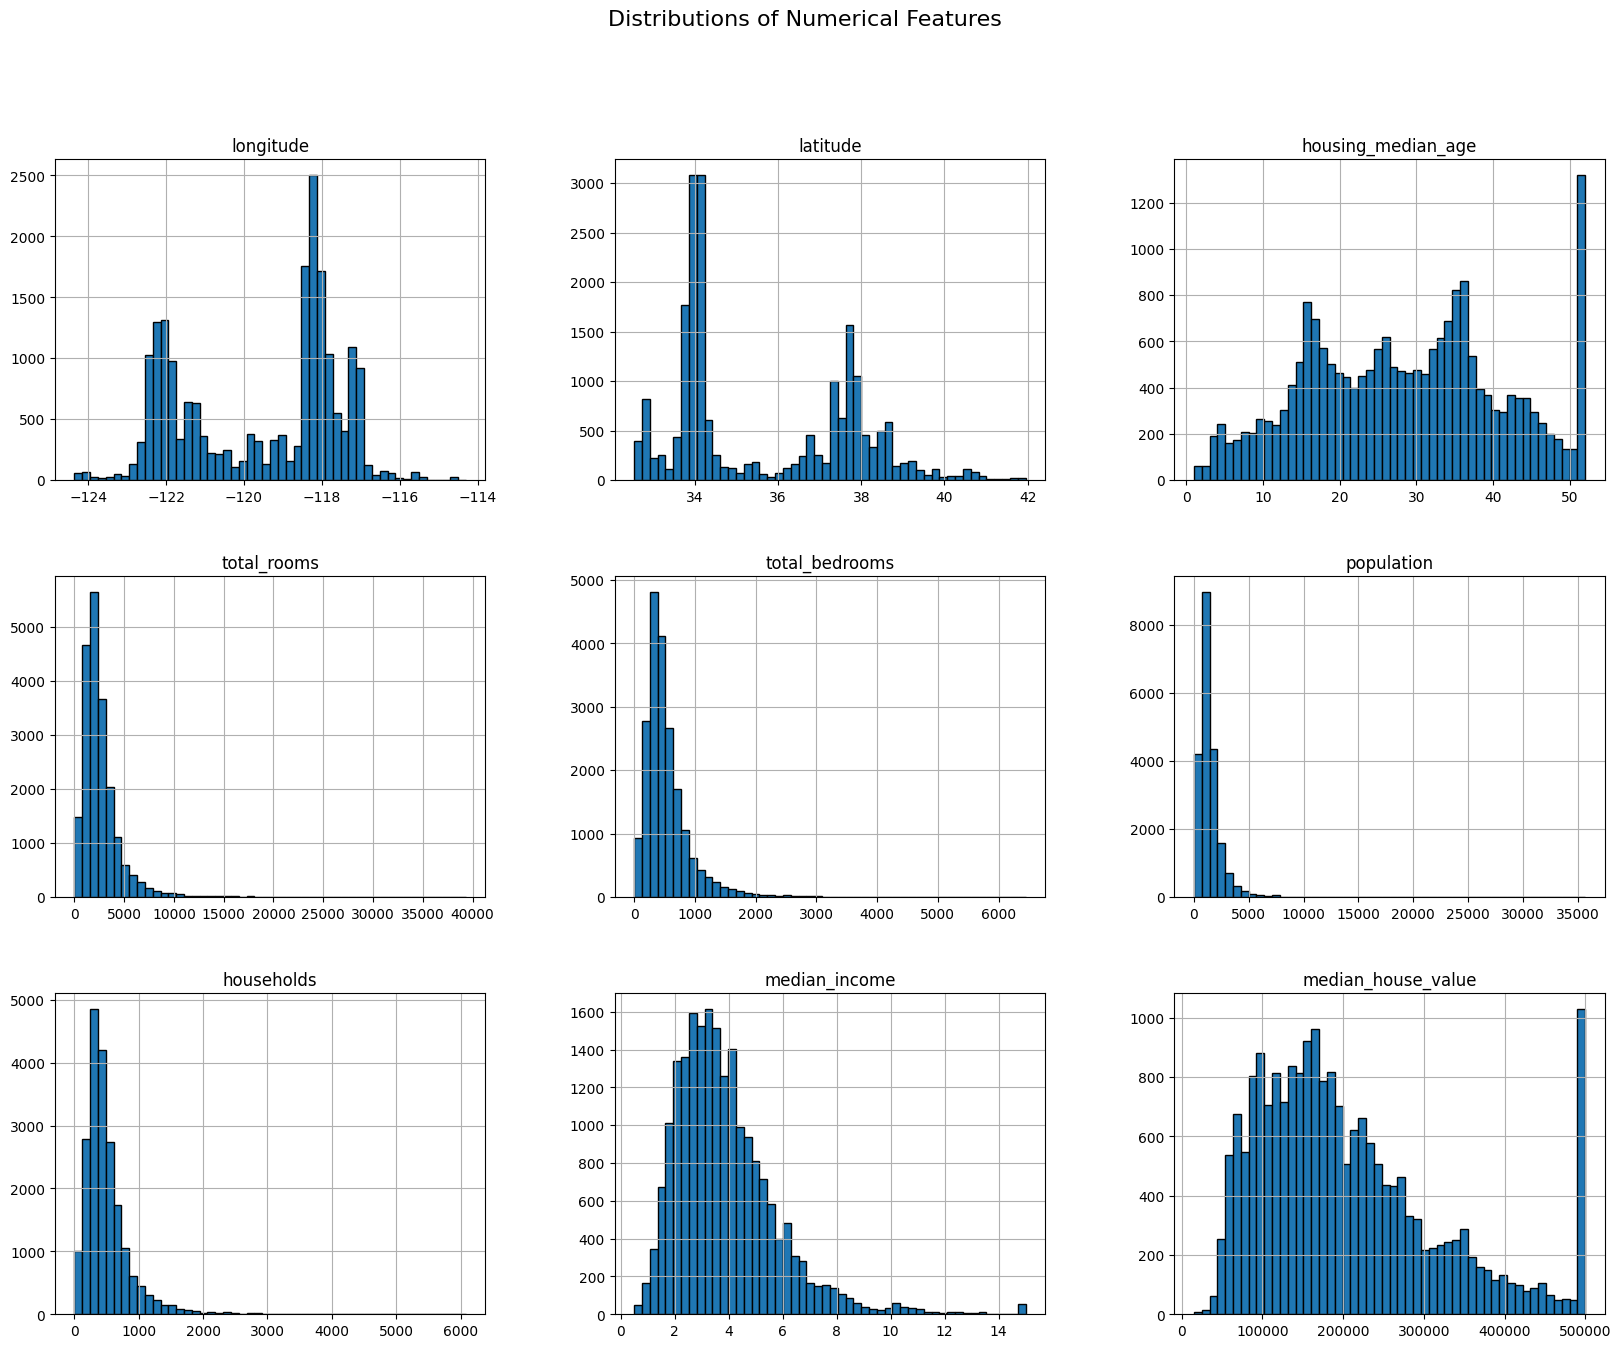

In [5]:
df.hist(bins=50, figsize=(20,15), edgecolor="black")
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()


the total bedrooms distribution is a little bit skewd so lets fill the missing withe median

In [8]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


# Now lets make some EDA to unedstand the dataset

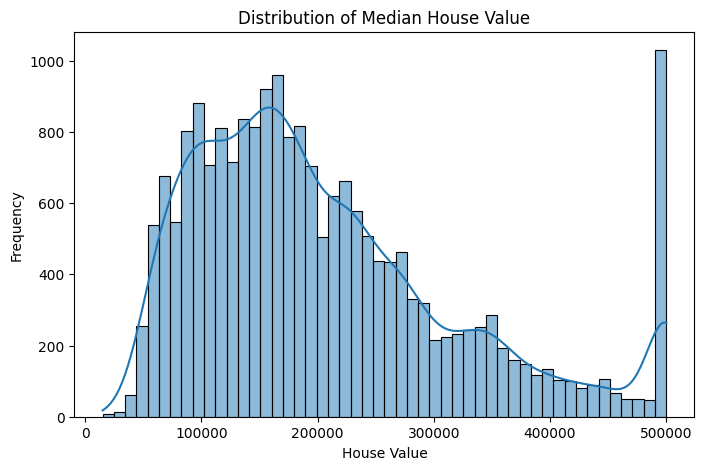

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.show()

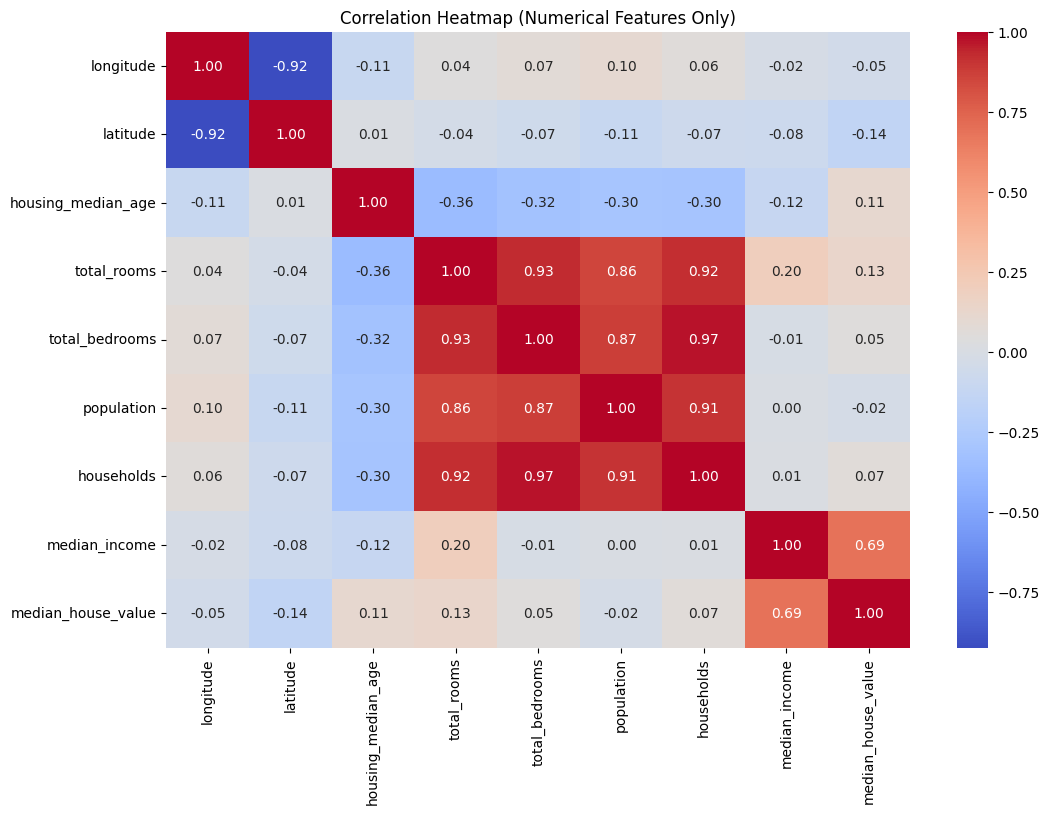

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


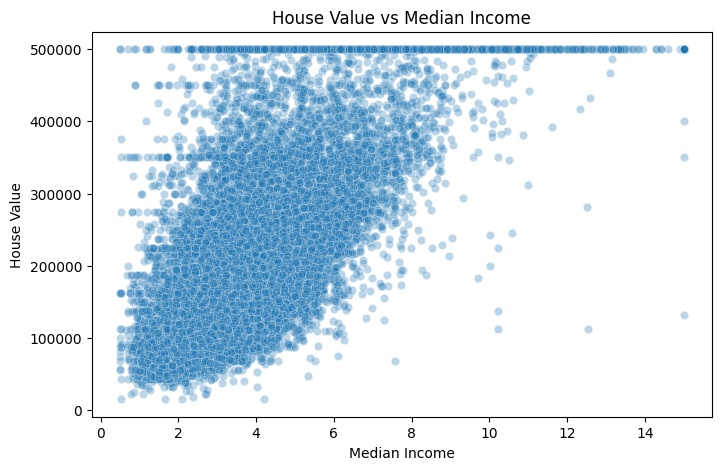

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.3)
plt.title("House Value vs Median Income")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.show()


linear relation

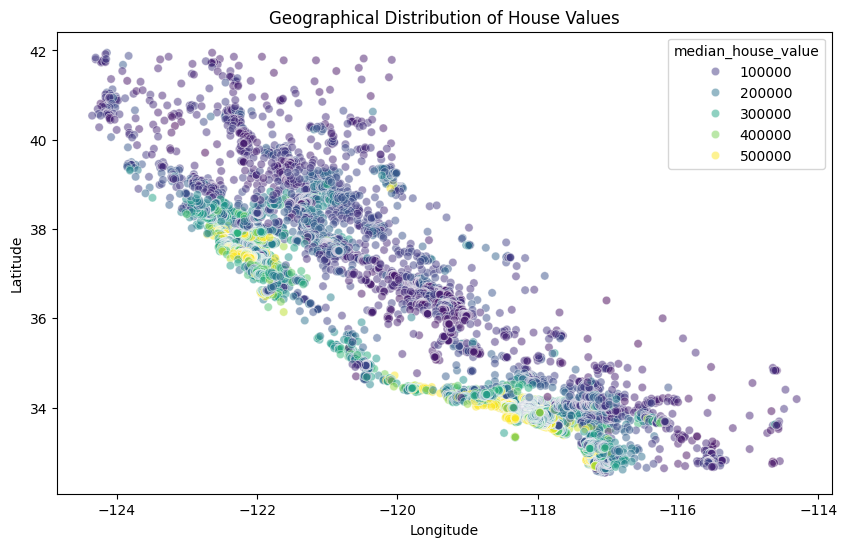

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value',
                data=df, palette='viridis', alpha=0.5)
plt.title("Geographical Distribution of House Values")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


/tmp/ipython-input-2291434641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ocean_proximity', data=df, palette="Set2")


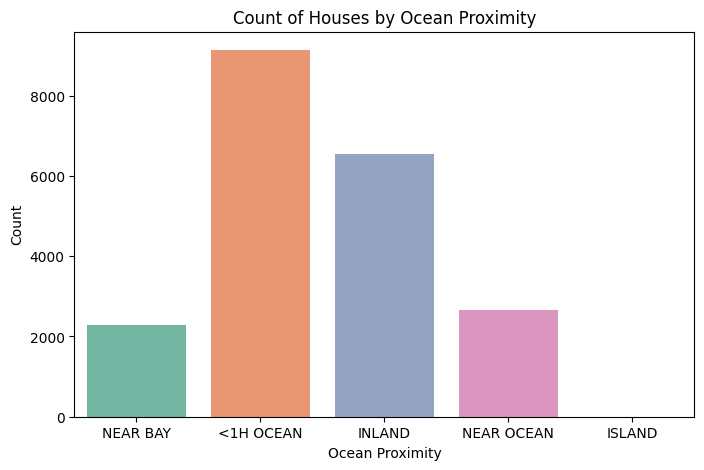

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='ocean_proximity', data=df, palette="Set2")
plt.title("Count of Houses by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-971052856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette="Set3")


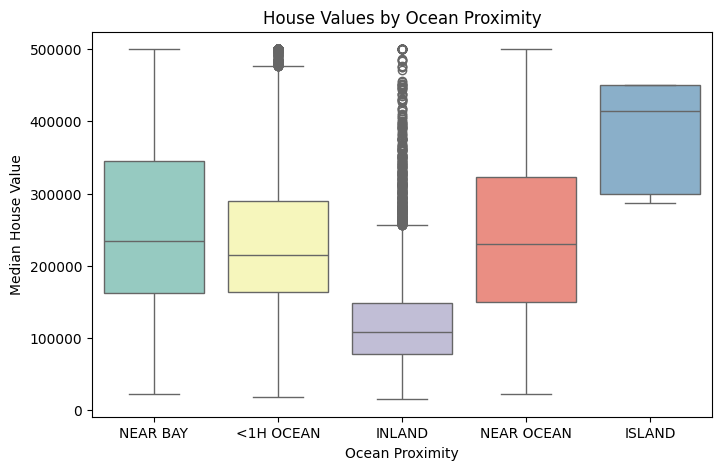

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette="Set3")
plt.title("House Values by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.show()


Island has the top and near has the most

Encode ocean proximity column

In [16]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


splitting the data

In [18]:
X = df_encoded.drop("median_house_value", axis=1)
y = df_encoded["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((16512, 12), (4128, 12))

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")



RMSE : 70060.52
R²   : 0.63


0.63 is very bad one and it is clear because it is linear one.
lets choose another model.

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE : {rmse_rf:.2f}")
print(f"Random Forest R²   : {r2_rf:.2f}")

Random Forest RMSE : 49038.21
Random Forest R²   : 0.82


this is a nice upgrade but still we need better

lets make some hyperparameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.8136528427516426


best score is 0.82 as we get in the previous one

In [31]:
from sklearn.ensemble import GradientBoostingRegressor


=gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"RMSE: {rmse_gb:.2f}")
print(f"R²: {r2_gb:.2f}")


RMSE: 49344.25
R²: 0.81


In [32]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"RMSE: {rmse_xgb:.2f}")
print(f"R²: {r2_xgb:.2f}")


RMSE: 46579.42
R²: 0.83


so this is the best one with 0.83

<Figure size 1200x800 with 0 Axes>

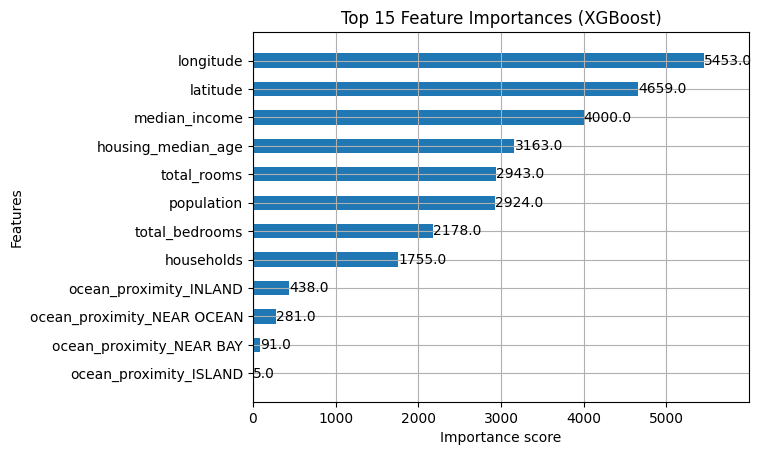

In [33]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(12,8))
plot_importance(xgb_model, importance_type='weight', max_num_features=15, height=0.5)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()


here are the top affecting features